   # **Text Classification Problem**

## Step 1: Install & import necessary libraries


*   **Hazm** is a python library to perform natural language processing tasks on Persian text



In [73]:
# !pip install python-bidi arabic_reshaper wordcloud
# !pip install hazm

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from wordcloud import WordCloud
import numpy as np
import statistics
import math
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import hazm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step 2: **Data Analysis and Preprocess**

In [75]:
file_path = './Data/dd_datascience_task.xlsx'
df = pd.read_excel(file_path)
df.head(5)

,user_id,timestamp,text,label
0,04dcb210-7906-4d7e-9179-9fc1041c36ad,1695111964,گروه های جام جهانی,football
1,83d0dc9b-02bc-4c07-b585-e7fae992b4f7,1695111856,ایران و انگلیس,football
2,34fc60e3-05a7-4783-841d-2a4f0b8afb92,1695111970,ایران و برزیل,football
3,10a8e3fe-442b-4d76-94fb-f42eb7b712b2,1695111864,آمار نتایج بازی های استقلال و پرسپولیس,football
4,02ac00cc-41eb-495d-8ceb-598318b4d3dd,1695111984,بارسلونا و رئال مادرید,football


Step 2.1: **Null Value Detection**

* There is no null value



In [76]:
null_values_num = df.isnull().sum()
null_values_num

user_id      0
timestamp    0
text         0
label        0
dtype: int64

Step 2.2: **Determining the Number of Unique Labels**

* The dataset divided into 5 different classes.

In [77]:
df['label'].unique()

array(['football', 'greeting', 'movie', 'music', 'application'],
      dtype=object)

Step 2.3: **Uniqueness Validation**

* We find out that a subset of user IDs is non-unique, meaning that multiple records share the same user identifier.

In [78]:
is_unique = df['user_id'].nunique() == len(df)

if is_unique:
    print("The 'user_id' column contains unique values.")
else:
    print("The 'user_id' column does not contain unique values.")

The 'user_id' column does not contain unique values.


* According to below studies, we figure out the dataset totally contains 695 users which divided into 5 distinct classes.

In [79]:
print(df['user_id'].unique().shape)
print(df.shape)

(695,)
(2518, 4)


* To provide a clearer picture of this discovery, we have selected a sample of 10 such user IDs for further examination

In [80]:
df['user_id'].unique()[:10]

array(['04dcb210-7906-4d7e-9179-9fc1041c36ad',
       '83d0dc9b-02bc-4c07-b585-e7fae992b4f7',
       '34fc60e3-05a7-4783-841d-2a4f0b8afb92',
       '10a8e3fe-442b-4d76-94fb-f42eb7b712b2',
       '02ac00cc-41eb-495d-8ceb-598318b4d3dd',
       '2ba27090-9ff3-4eb7-accd-b254cc33b6ab',
       '8b401b93-2d8f-4b05-b161-019fdee37caa',
       '3a82fa7b-76f0-4db8-b247-d224218b008b',
       '5ef77537-15f5-4248-ab3a-c32807d6623d',
       '1d8cca5b-be2c-4d26-88ed-4b979cc6afad'], dtype=object)

Step 2.4: **User Data Segmentation**

* The frequencies of the users' data in each class is described in the below cell.

In [81]:
label_counts = df['user_id'].value_counts()
label_counts

0e738beb-42df-4565-a219-9aa17f9bbd1c    112
2a1042d9-08a4-4463-96a0-1756f390603b     77
04dcb210-7906-4d7e-9179-9fc1041c36ad     66
ee3856cd-dbcd-4c8c-a51f-6bbb555ce236     56
1d8cca5b-be2c-4d26-88ed-4b979cc6afad     55
                                       ... 
260d8d1f-9fc3-4292-95f6-4dd2ad69efe6      1
31e51426-d546-4bd8-a851-f98fcdd49537      1
82398f08-7b60-4b2d-83a1-08f138c60f61      1
265f186c-f78b-4a32-a0c8-2b4d9708bb73      1
99d7be46-2206-4d77-9741-4f691aeb2e99      1
Name: user_id, Length: 695, dtype: int64

* For example, the below samples belong to user with user-id equals to 04dcb210-7906-4d7e-9179-9fc1041c36ad.


In [82]:
print(df[df['user_id'] == '04dcb210-7906-4d7e-9179-9fc1041c36ad'])

                                   user_id   timestamp  \
0     04dcb210-7906-4d7e-9179-9fc1041c36ad  1695111964   
26    04dcb210-7906-4d7e-9179-9fc1041c36ad  1695112005   
92    04dcb210-7906-4d7e-9179-9fc1041c36ad  1695113960   
95    04dcb210-7906-4d7e-9179-9fc1041c36ad  1695114550   
100   04dcb210-7906-4d7e-9179-9fc1041c36ad  1695114600   
...                                    ...         ...   
2306  04dcb210-7906-4d7e-9179-9fc1041c36ad  1695121725   
2332  04dcb210-7906-4d7e-9179-9fc1041c36ad  1695122552   
2336  04dcb210-7906-4d7e-9179-9fc1041c36ad  1695122578   
2342  04dcb210-7906-4d7e-9179-9fc1041c36ad  1695122498   
2348  04dcb210-7906-4d7e-9179-9fc1041c36ad  1695122525   

                            text         label  
0              گروه های جام جهانی     football  
26    بازی های ایران و نیکاراگوئه     football  
92           بازیکنان بایرن مونیخ     football  
95                   آزادی فرانسه     football  
100          بازی آرژانتین فرانسه     football  
...      

Step 2.5: **Quantifying the Number of Each Label**

* Enumerating and identifying all the unique labels present in our dataset

In [83]:
label_counts = df['label'].value_counts()
label_counts

movie          1175
football        590
greeting        255
application     250
music           248
Name: label, dtype: int64

* For example, the following samples are belong to **football class**.

In [84]:
print(df[df['label'] == 'football'])

                                   user_id   timestamp  \
0     04dcb210-7906-4d7e-9179-9fc1041c36ad  1695111964   
1     83d0dc9b-02bc-4c07-b585-e7fae992b4f7  1695111856   
2     34fc60e3-05a7-4783-841d-2a4f0b8afb92  1695111970   
3     10a8e3fe-442b-4d76-94fb-f42eb7b712b2  1695111864   
4     02ac00cc-41eb-495d-8ceb-598318b4d3dd  1695111984   
...                                    ...         ...   
2055  7e4fb4cf-f603-462c-870c-e66a40ccec6c  1695116694   
2058  713a3ca4-a837-4317-be15-a55837101212  1695116820   
2060  29e77e02-84a7-486a-9330-e600d68dbbea  1695116720   
2063  6565c314-8886-485b-8bbb-df5cac1c1cb9  1695116731   
2066  7e4fb4cf-f603-462c-870c-e66a40ccec6c  1695116869   

                                                  text      label  
0                                    گروه های جام جهانی  football  
1                                        ایران و انگلیس  football  
2                                         ایران و برزیل  football  
3                آمار نتایج باز

In [85]:
# Convert the 'Timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head(5)

,user_id,timestamp,text,label
0,04dcb210-7906-4d7e-9179-9fc1041c36ad,2023-09-19 08:26:04,گروه های جام جهانی,football
1,83d0dc9b-02bc-4c07-b585-e7fae992b4f7,2023-09-19 08:24:16,ایران و انگلیس,football
2,34fc60e3-05a7-4783-841d-2a4f0b8afb92,2023-09-19 08:26:10,ایران و برزیل,football
3,10a8e3fe-442b-4d76-94fb-f42eb7b712b2,2023-09-19 08:24:24,آمار نتایج بازی های استقلال و پرسپولیس,football
4,02ac00cc-41eb-495d-8ceb-598318b4d3dd,2023-09-19 08:26:24,بارسلونا و رئال مادرید,football


In [86]:
# Sort the dataframe based on timestamp
df.sort_values(by='timestamp', ascending=True, inplace=True)
print("Sorted DataFrame:")
df

Sorted DataFrame:


,user_id,timestamp,text,label
2480,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:01:48,اهنگ های قدیمی,music
2481,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:02:06,اهنگ های معین زند,music
2485,ee51c31f-f6a8-4809-a870-06ed50190354,2023-09-18 20:02:23,اهنگ هندی,music
2486,fe60a7d9-66ce-4b0f-9323-709269d4df44,2023-09-18 20:02:31,اهنگ هیو هیا هیه چه ممحشری,music
2489,d7118fe2-b743-484b-b188-0f26b7e164bb,2023-09-18 20:02:39,اهنگشا,music
...,...,...,...,...
1573,ca1ef626-ec0b-4447-897e-12ddcda53eb5,2023-09-19 14:30:35,فیلم های جنگی رایان فیلیپ,movie
1574,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:30:42,فیلم های فانتزی با امتیاز ۷,movie
1576,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:10,مستندهای ساختگی با نقش آفرینی لیسا هاوارد در س...,movie
1571,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:19,نتایج بازی های دیشب لیگ کنفرانس,football


* As you can see, the data is began from 2023-09-18 20:01:48 to 2023-09-19 14:30:43, which covers a period of 18 hours and 30 minutes.

In [87]:
min_date = df['timestamp'].min()
max_date = df['timestamp'].max()

print('Start Date:')
print(min_date)

print('\nFinish Date:')
print(max_date)
period = max_date - min_date
print("\nPeriod of Data:", period)

Start Date:
2023-09-18 20:01:48

Finish Date:
2023-09-19 14:32:43

Period of Data: 0 days 18:30:55


* Most common labels for each user.

In [88]:
label_counts = df.groupby(['user_id', 'label']).size().unstack(fill_value=0)
most_common_label = label_counts.idxmax(axis=1)
result_df = pd.DataFrame({'user_id': most_common_label.index, 'most_common_label': most_common_label.values})
print(result_df)


                                  user_id most_common_label
0    00ab8d8b-b065-4f09-83e6-7d07ee78ebf5             movie
1    01119504-b788-4357-8c77-e9a4140e2b0d             movie
2    019b0d3b-36a8-472c-9a9c-c05fa11f599b             music
3    01d79020-5a49-443b-bad3-a119e02f7846             movie
4    02ac00cc-41eb-495d-8ceb-598318b4d3dd          football
..                                    ...               ...
690  fe0bbacd-14b4-47d8-b37a-35039f1a6005             music
691  fe60a7d9-66ce-4b0f-9323-709269d4df44             music
692  ff1cbf47-1100-4dca-929d-039e8f6beeb6             movie
693  ffa56be9-cdac-43c4-ae08-728ce5f949da          football
694  ffbaedfb-730d-4fb9-9049-9437ed203392             movie

[695 rows x 2 columns]


Step 2.6: We have defined some functions to read the dataset and plot them for some basic analysis

In [89]:
def plot_file_counts(df, category_col):
    '''
    This function takes a dataframe and the name of the column containing
    category labels as input. It counts the number of text files per label
    and plots them as a horizontal bar chart.
    '''
    file_counts = df[category_col].value_counts()

    fig, ax = plt.subplots(figsize=(8,6))
    ax.barh(file_counts.index, file_counts.values, alpha=0.8)
    ax.set_xlabel('Number of Text Files')
    ax.set_ylabel('Category')
    ax.set_title('Number of Text Files per Category')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()

In [90]:
font_file = './arial.ttf'
def plot_wordclouds(df, text_col, category_col):
    '''
    This function takes a DataFrame, a text column name, and a category column name as input.
    It generates a word cloud visualization for each label in the DataFrame and displays them in a grid of subplots.
    '''

    grouped = df.groupby(category_col)

    n_categories = len(grouped)
    n_cols = min(n_categories, 3)
    n_rows = int(n_categories / n_cols) + (n_categories % n_cols > 0)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))

    for (category, group), ax in zip(grouped, axes.flatten()):
        text = ' '.join(group[text_col].tolist())
        wordcloud = WordCloud(font_path=font_file,width=400, height=400, max_words=100, background_color='white', colormap='Blues').generate(text)

        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(category)
        ax.axis('off')

    for i in range(n_categories, n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [91]:
def calculate_text_length_stats(df, split_char=' '):
    '''
    This function takes a DataFrame and an optional split character as input.
    It calculates various statistics related to the number of words per text file for each label in the DataFrame.
    The function returns two objects: a dictionary of global statistics and a DataFrame of statistics per label.
    '''

    categories = df['label'].unique()

    all_lengths = []
    per_label = {
        'lengths': {c:[] for c in categories},
        'mean': {c:0 for c in categories},
        'stdev': {c:0 for c in categories}
    }

    for index, row in df.iterrows():
        text = row['text ']
        label = row['label']

        text = re.sub(r"\s+", ' ', text)

        text = text.split(split_char)

        l = len(text)

        all_lengths.append(l)
        per_label['lengths'][label].append(l)

    for c in categories:
        per_label['mean'][c] = statistics.mean(per_label['lengths'][c])
        per_label['stdev'][c] = statistics.stdev(per_label['lengths'][c])

    global_stats = {
        'mean': statistics.mean(all_lengths),
        'stdev': statistics.stdev(all_lengths),
        'lengths': all_lengths
    }

    return {
        'global': global_stats,
        'per_label': pd.DataFrame(per_label)
    }

In [92]:
def plot_text_length_histograms(df_stats, n_cols=3):
    '''
    This function takes a dictionary of global and per-label statistics as input,
    along with an optional number of columns for the grid of subplots.
    It generates a histogram of text length distributions for each label in the dataset,
    and displays them in a grid of subplots.
    '''

    categories = df['label'].unique()

    n_rows = math.ceil(len(categories) / n_cols)

    plt.figure(figsize=(15, 8))
    plt.suptitle('Distribution of Text Lengths')

    plt.subplot(n_rows, n_cols, 1)
    plt.title('All Categories')
    lengths = df_stats['global']['lengths']
    plt.hist(lengths, color='r')

    index_subplot = 2
    for c in categories:
        plt.subplot(n_rows, n_cols, index_subplot)
        plt.title('label: %s' % c)

        lengths = df_stats['per_label']['lengths'][c]
        plt.hist(lengths, color='b')

        index_subplot += 1

    plt.show()

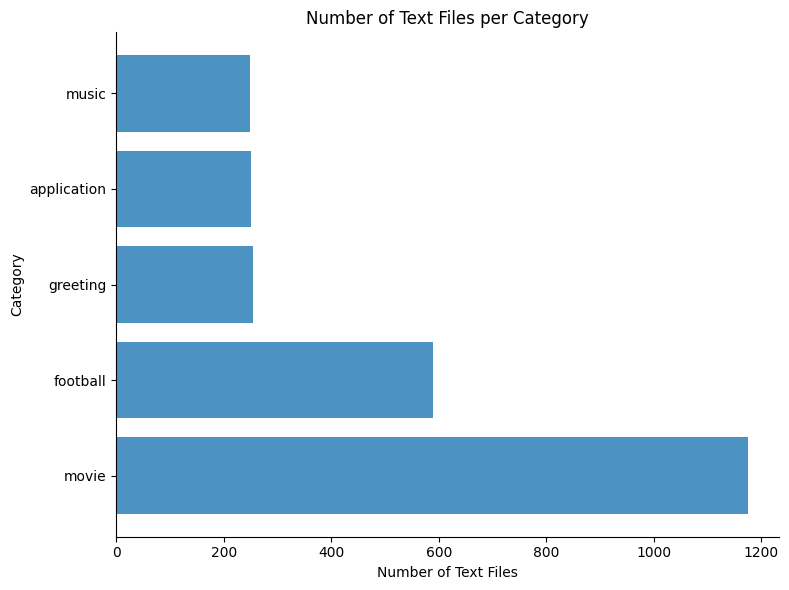

In [93]:
plot_file_counts(df, 'label')

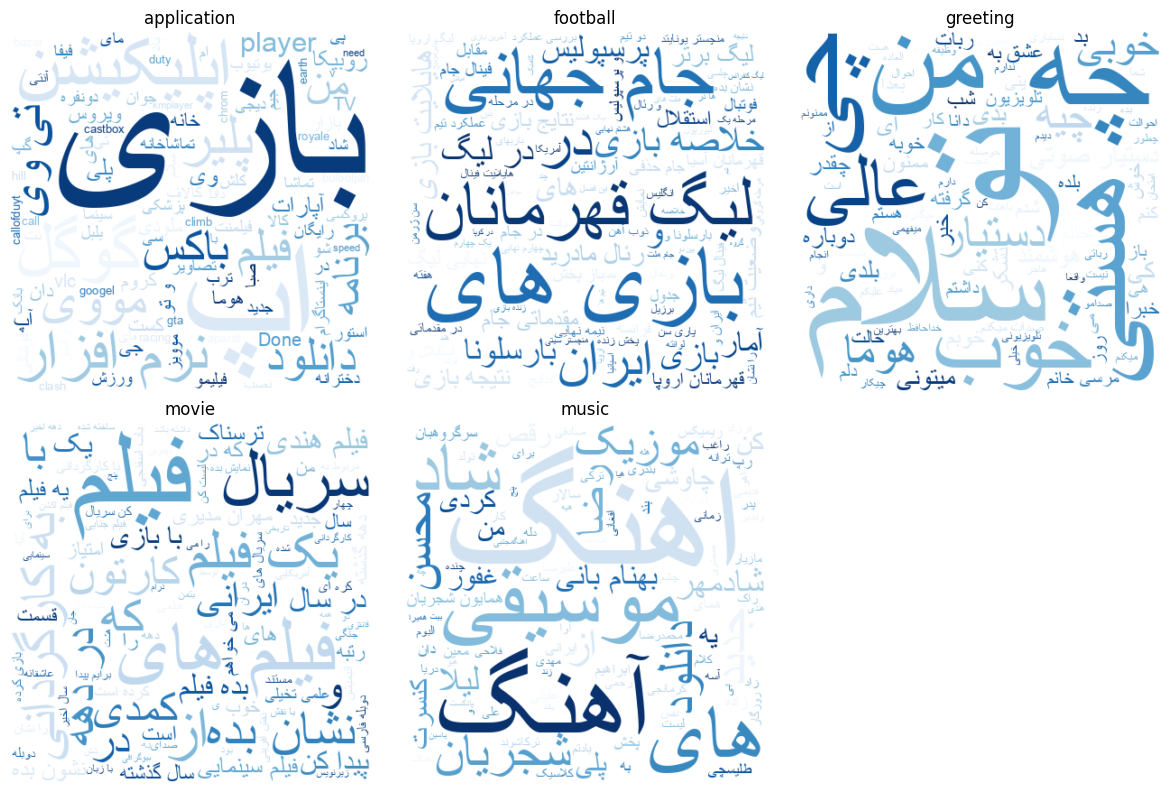

In [94]:
plot_wordclouds(df, 'text ', 'label')

In [95]:
stats = calculate_text_length_stats(df)
stats['per_label']


,lengths,mean,stdev
music,"[3, 4, 2, 6, 1, 1, 4, 3, 3, 1, 5, 3, 2, 2, 2, ...",2.830645,1.392413
movie,"[10, 10, 9, 14, 16, 14, 13, 9, 7, 9, 6, 12, 11...",5.715745,4.258978
football,"[10, 5, 9, 7, 6, 9, 9, 6, 14, 14, 12, 14, 15, ...",6.484746,3.270842
greeting,"[1, 1, 1, 2, 2, 1, 3, 2, 2, 4, 2, 2, 2, 2, 2, ...",2.376471,1.186968
application,"[1, 1, 1, 1, 3, 1, 2, 1, 2, 2, 3, 1, 3, 1, 3, ...",1.988000,0.847780


**In these histograms and stats, we can see that almost all texts contain $20$ or less words. Also, we can see that the average length is very different depending on the category.**

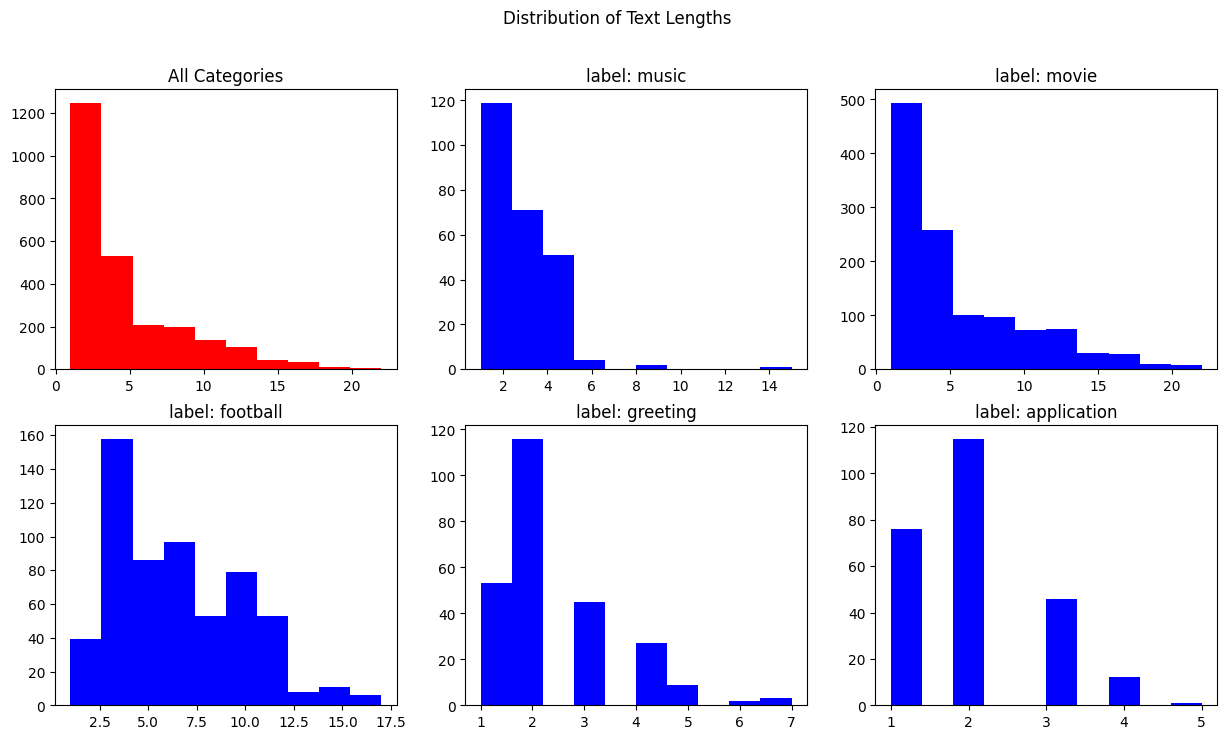

In [96]:
plot_text_length_histograms(stats)

Step 2.7: **Clean characters**

* First, we have removed every character which cannot be used to write words in Persian (this set of characters is different in other languages). Using the following function, we have remove all puntuation symbols and normalize the white spaces.

In [97]:
def clean_punctuation(df):
    new_text = []
    """
    Clean punctuation and normalize whitespace in the 'text' column of a DataFrame.
    Replaces all punctuation characters with spaces, and normalizes whitespace characters to a single space.
    """
    df['text '] = df['text '].str.replace(r'[^\w\sآ-ی]+', '').str.replace(r'\s+', ' ').str.strip()
    return df

In [98]:
df = clean_punctuation(df)
df.head(80)

<ipython-input-97-138bd4fa013d>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text '] = df['text '].str.replace(r'[^\w\sآ-ی]+', '').str.replace(r'\s+', ' ').str.strip()


,user_id,timestamp,text,label
2480,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:01:48,اهنگ های قدیمی,music
2481,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:02:06,اهنگ های معین زند,music
2485,ee51c31f-f6a8-4809-a870-06ed50190354,2023-09-18 20:02:23,اهنگ هندی,music
2486,fe60a7d9-66ce-4b0f-9323-709269d4df44,2023-09-18 20:02:31,اهنگ هیو هیا هیه چه ممحشری,music
2489,d7118fe2-b743-484b-b188-0f26b7e164bb,2023-09-18 20:02:39,اهنگشا,music
...,...,...,...,...
1614,30b6d957-16a9-464c-9ae0-31d6cc896074,2023-09-19 01:51:32,خلاصه بازی رفت دربی شهر میلان در نیمه نهایی کو...,football
1615,30b6d957-16a9-464c-9ae0-31d6cc896074,2023-09-19 01:52:27,فیلم های کمدی مربوط به دهه 2000 با نقش آفرینی ...,movie
1616,30b6d957-16a9-464c-9ae0-31d6cc896074,2023-09-19 01:52:56,بدترین فیلم ترسناک در سال 2010 چه بود,movie
1617,4141e0af-c131-46d3-96ee-b8a2bcf952e5,2023-09-19 01:55:33,قرعه تیم بارسلونا در مرحله یک چهارم نهایی لیگ ...,football


In [99]:
def normalize_dataset(df):
    """
    Normalize the text data in a DataFrame using the hazm library.
    """
    normalizer = hazm.Normalizer()
    df['normalized_text'] = df['text '].apply(lambda x: normalizer.normalize(x))
    return df


In [100]:
df = normalize_dataset(df)
df

,user_id,timestamp,text,label,normalized_text
2480,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:01:48,اهنگ های قدیمی,music,اهنگ‌های قدیمی
2481,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:02:06,اهنگ های معین زند,music,اهنگ‌های معین زند
2485,ee51c31f-f6a8-4809-a870-06ed50190354,2023-09-18 20:02:23,اهنگ هندی,music,اهنگ هندی
2486,fe60a7d9-66ce-4b0f-9323-709269d4df44,2023-09-18 20:02:31,اهنگ هیو هیا هیه چه ممحشری,music,اهنگ هیو هیا هیه چه ممحشری
2489,d7118fe2-b743-484b-b188-0f26b7e164bb,2023-09-18 20:02:39,اهنگشا,music,اهنگشا
...,...,...,...,...,...
1573,ca1ef626-ec0b-4447-897e-12ddcda53eb5,2023-09-19 14:30:35,فیلم های جنگی رایان فیلیپ,movie,فیلم‌های جنگی رایان فیلیپ
1574,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:30:42,فیلم های فانتزی با امتیاز ۷,movie,فیلم‌های فانتزی با امتیاز ۷
1576,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:10,مستندهای ساختگی با نقش آفرینی لیسا هاوارد در س...,movie,مستندهای ساختگی با نقش‌آفرینی لیسا هاوارد در س...
1571,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:19,نتایج بازی های دیشب لیگ کنفرانس,football,نتایج بازی‌های دیشب لیگ کنفرانس


In [101]:
def tokenize_dataset(df, join_char=' '):
    """
    tokenize the 'text' column of a pandas DataFrame using the Hazm library.
    """
    word_tokenizer = hazm.WordTokenizer()
    df['tokenized_text'] = df['text '].apply(lambda x: word_tokenizer.tokenize(x))
    df['normalized_tokenized_text'] = df['normalized_text'].apply(lambda x: word_tokenizer.tokenize(x))
    return df

In [102]:
df = tokenize_dataset(df)
df

,user_id,timestamp,text,label,normalized_text,tokenized_text,normalized_tokenized_text
2480,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:01:48,اهنگ های قدیمی,music,اهنگ‌های قدیمی,"[اهنگ, های, قدیمی]","[اهنگ‌های, قدیمی]"
2481,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:02:06,اهنگ های معین زند,music,اهنگ‌های معین زند,"[اهنگ, های, معین, زند]","[اهنگ‌های, معین, زند]"
2485,ee51c31f-f6a8-4809-a870-06ed50190354,2023-09-18 20:02:23,اهنگ هندی,music,اهنگ هندی,"[اهنگ, هندی]","[اهنگ, هندی]"
2486,fe60a7d9-66ce-4b0f-9323-709269d4df44,2023-09-18 20:02:31,اهنگ هیو هیا هیه چه ممحشری,music,اهنگ هیو هیا هیه چه ممحشری,"[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, چه, ممحشری]"
2489,d7118fe2-b743-484b-b188-0f26b7e164bb,2023-09-18 20:02:39,اهنگشا,music,اهنگشا,[اهنگشا],[اهنگشا]
...,...,...,...,...,...,...,...
1573,ca1ef626-ec0b-4447-897e-12ddcda53eb5,2023-09-19 14:30:35,فیلم های جنگی رایان فیلیپ,movie,فیلم‌های جنگی رایان فیلیپ,"[فیلم, های, جنگی, رایان, فیلیپ]","[فیلم‌های, جنگی, رایان, فیلیپ]"
1574,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:30:42,فیلم های فانتزی با امتیاز ۷,movie,فیلم‌های فانتزی با امتیاز ۷,"[فیلم, های, فانتزی, با, امتیاز, ۷]","[فیلم‌های, فانتزی, با, امتیاز, ۷]"
1576,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:10,مستندهای ساختگی با نقش آفرینی لیسا هاوارد در س...,movie,مستندهای ساختگی با نقش‌آفرینی لیسا هاوارد در س...,"[مستندهای, ساختگی, با, نقش, آفرینی, لیسا, هاوا...","[مستندهای, ساختگی, با, نقش‌آفرینی, لیسا, هاوار..."
1571,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:19,نتایج بازی های دیشب لیگ کنفرانس,football,نتایج بازی‌های دیشب لیگ کنفرانس,"[نتایج, بازی, های, دیشب, لیگ, کنفرانس]","[نتایج, بازی‌های, دیشب, لیگ, کنفرانس]"


 Step 2.8: **Lematization**

 * In this section, we are going to do lematization over the texts. To do so, we will use the HAZM library since it already has detailed dictionaries which the algorithm can look through to link the form back to its lemma.

 We can illustrate the method with an example:
        
        |   Word   | Lemma |
        |----------|-------|
        | studying | study |
        | studies  | study |
This process may look similar to *stemming* (which we are not going to use), but it leads to a different result.

In [103]:
def lemmatize_dataset(df, join_char=' '):
    """
    Lemmatize the 'text' column of a pandas DataFrame using HAZM library.
    """

    lemmatizer = hazm.Lemmatizer()
    df['lemmatized_text'] = df['normalized_tokenized_text'].apply(lambda x : list(map(lemmatizer.lemmatize, x)))
    return df

In [104]:
lemmatize_dataset(df)
df

,user_id,timestamp,text,label,normalized_text,tokenized_text,normalized_tokenized_text,lemmatized_text
2480,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:01:48,اهنگ های قدیمی,music,اهنگ‌های قدیمی,"[اهنگ, های, قدیمی]","[اهنگ‌های, قدیمی]","[اهنگ‌های, قدیم]"
2481,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:02:06,اهنگ های معین زند,music,اهنگ‌های معین زند,"[اهنگ, های, معین, زند]","[اهنگ‌های, معین, زند]","[اهنگ‌های, معین, زند]"
2485,ee51c31f-f6a8-4809-a870-06ed50190354,2023-09-18 20:02:23,اهنگ هندی,music,اهنگ هندی,"[اهنگ, هندی]","[اهنگ, هندی]","[اهنگ, هند]"
2486,fe60a7d9-66ce-4b0f-9323-709269d4df44,2023-09-18 20:02:31,اهنگ هیو هیا هیه چه ممحشری,music,اهنگ هیو هیا هیه چه ممحشری,"[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, چه, ممحشری]"
2489,d7118fe2-b743-484b-b188-0f26b7e164bb,2023-09-18 20:02:39,اهنگشا,music,اهنگشا,[اهنگشا],[اهنگشا],[اهنگشا]
...,...,...,...,...,...,...,...,...
1573,ca1ef626-ec0b-4447-897e-12ddcda53eb5,2023-09-19 14:30:35,فیلم های جنگی رایان فیلیپ,movie,فیلم‌های جنگی رایان فیلیپ,"[فیلم, های, جنگی, رایان, فیلیپ]","[فیلم‌های, جنگی, رایان, فیلیپ]","[فیلم, جنگی, را, فیلیپ]"
1574,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:30:42,فیلم های فانتزی با امتیاز ۷,movie,فیلم‌های فانتزی با امتیاز ۷,"[فیلم, های, فانتزی, با, امتیاز, ۷]","[فیلم‌های, فانتزی, با, امتیاز, ۷]","[فیلم, فانتزی, با, امتیاز, ۷]"
1576,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:10,مستندهای ساختگی با نقش آفرینی لیسا هاوارد در س...,movie,مستندهای ساختگی با نقش‌آفرینی لیسا هاوارد در س...,"[مستندهای, ساختگی, با, نقش, آفرینی, لیسا, هاوا...","[مستندهای, ساختگی, با, نقش‌آفرینی, لیسا, هاوار...","[مستند, ساختگی, با, نقش‌آفرینی, لیسا, هاوارد, ..."
1571,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:19,نتایج بازی های دیشب لیگ کنفرانس,football,نتایج بازی‌های دیشب لیگ کنفرانس,"[نتایج, بازی, های, دیشب, لیگ, کنفرانس]","[نتایج, بازی‌های, دیشب, لیگ, کنفرانس]","[نتایج, بازی, دیشب, لیگ, کنفرانس]"


   Step 2.9: **Remove Stop words**

 Stop words are a set of commonly used words in any language. For example, in Persian, \"از\", \"با\" و \"یا\", would easily qualify as stop words. These words are not semantically useful in the sentences, thus it is a good idea to remove them and focus on important words instead.


In [105]:
# we have defined a list of possible stopwords
stop_words = ['و','در','به','از','كه','مي','اين','است','را','با','های','براي','آن','يك','شود','شده','خود','ها','كرد','شد','اي','تا','كند','بر','بود','گفت','نيز','وي','هم','كنند','دارد','ما','كرده','يا','اما','بايد','دو','اند','هر','خواهد','او','مورد','آنها','باشد','ديگر','مردم','نمي','بين','پيش','پس','اگر','همه','صورت','يكي','هستند','بي','من','دهد','هزار','نيست','استفاده','داد','داشته','راه','داشت','چه','همچنين','كردند','داده','بوده','دارند','همين','ميليون','سوي','شوند','بيشتر','بسيار','روي','گرفته','هايي','تواند','اول','نام','هيچ','چند','جديد','بيش','شدن','كردن','كنيم','نشان','حتي','اينكه','ولی','توسط','چنين','برخي','نه','ديروز','دوم','درباره','بعد','مختلف','گيرد','شما','گفته','آنان','بار','طور','گرفت','دهند','گذاري','بسياري','طي','بودند','ميليارد','بدون','تمام','كل','تر','براساس','شدند','ترين','امروز','باشند','ندارد','چون','قابل','گويد','ديگري','همان','خواهند','قبل','آمده','اكنون','تحت','طريق','گيري','جاي','هنوز','چرا','البته','كنيد','سازي','سوم','كنم','بلكه','زير','توانند','ضمن','فقط','بودن','حق','آيد','وقتي','اش','يابد','نخستين','مقابل','خدمات','امسال','تاكنون','مانند','تازه','آورد','فكر','آنچه','نخست','نشده','شايد','چهار','جريان','پنج','ساخته','زيرا','نزديك','برداري','كسي','ريزي','رفت','گردد','مثل','آمد','ام','بهترين','دانست','كمتر','دادن','تمامي','جلوگيري','بيشتري','ايم','ناشي','چيزي','آنكه','بالا','بنابراين','ايشان','بعضي','دادند','داشتند','برخوردار','نخواهد','هنگام','نبايد','غير','نبود','ديده','وگو','داريم','چگونه','بندي','خواست','فوق','ده','نوعي','هستيم','ديگران','همچنان','سراسر','ندارند','گروهي','سعي','روزهاي','آنجا','يكديگر','كردم','بيست','بروز','سپس','رفته','آورده','نمايد','باشيم','گويند','زياد','خويش','همواره','گذاشته','نداشته','شناسي','خواهيم','آباد','داشتن','نظير','همچون','باره','نكرده','شان','سابق','هفت','دانند','جايي','بی','جز','زیرِ','رویِ','سریِ','تویِ','جلویِ','پیشِ','عقبِ','بالایِ','خارجِ','وسطِ','بیرونِ','سویِ','کنارِ','پاعینِ','نزدِ','نزدیکِ','دنبالِ','حدودِ','برابرِ','طبقِ','مانندِ','ضدِّ','هنگامِ','برایِ','مثلِ','بارة','اثرِ','تولِ','علّتِ','سمتِ','عنوانِ','قصدِ','روب','جدا','کی','که','چیست','هست','کجا','کجاست','کَی','چطور','کدام','آیا','مگر','چندین','یک','چیزی','دیگر','کسی','بعری','هیچ','چیز','جا','کس','هرگز','یا','تنها','بلکه','خیاه','بله','بلی','آره','آری','مرسی','البتّه','لطفاً','ّه','انکه','وقتیکه','همین','پیش','مدّتی','هنگامی','مان','تان']

def remove_stop_words(word_list):
    return [word for word in word_list if word not in stop_words]

df['filtered_words'] = df['lemmatized_text'].apply(remove_stop_words)
df

,user_id,timestamp,text,label,normalized_text,tokenized_text,normalized_tokenized_text,lemmatized_text,filtered_words
2480,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:01:48,اهنگ های قدیمی,music,اهنگ‌های قدیمی,"[اهنگ, های, قدیمی]","[اهنگ‌های, قدیمی]","[اهنگ‌های, قدیم]","[اهنگ‌های, قدیم]"
2481,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:02:06,اهنگ های معین زند,music,اهنگ‌های معین زند,"[اهنگ, های, معین, زند]","[اهنگ‌های, معین, زند]","[اهنگ‌های, معین, زند]","[اهنگ‌های, معین, زند]"
2485,ee51c31f-f6a8-4809-a870-06ed50190354,2023-09-18 20:02:23,اهنگ هندی,music,اهنگ هندی,"[اهنگ, هندی]","[اهنگ, هندی]","[اهنگ, هند]","[اهنگ, هند]"
2486,fe60a7d9-66ce-4b0f-9323-709269d4df44,2023-09-18 20:02:31,اهنگ هیو هیا هیه چه ممحشری,music,اهنگ هیو هیا هیه چه ممحشری,"[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, ممحشری]"
2489,d7118fe2-b743-484b-b188-0f26b7e164bb,2023-09-18 20:02:39,اهنگشا,music,اهنگشا,[اهنگشا],[اهنگشا],[اهنگشا],[اهنگشا]
...,...,...,...,...,...,...,...,...,...
1573,ca1ef626-ec0b-4447-897e-12ddcda53eb5,2023-09-19 14:30:35,فیلم های جنگی رایان فیلیپ,movie,فیلم‌های جنگی رایان فیلیپ,"[فیلم, های, جنگی, رایان, فیلیپ]","[فیلم‌های, جنگی, رایان, فیلیپ]","[فیلم, جنگی, را, فیلیپ]","[فیلم, جنگی, فیلیپ]"
1574,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:30:42,فیلم های فانتزی با امتیاز ۷,movie,فیلم‌های فانتزی با امتیاز ۷,"[فیلم, های, فانتزی, با, امتیاز, ۷]","[فیلم‌های, فانتزی, با, امتیاز, ۷]","[فیلم, فانتزی, با, امتیاز, ۷]","[فیلم, فانتزی, امتیاز, ۷]"
1576,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:10,مستندهای ساختگی با نقش آفرینی لیسا هاوارد در س...,movie,مستندهای ساختگی با نقش‌آفرینی لیسا هاوارد در س...,"[مستندهای, ساختگی, با, نقش, آفرینی, لیسا, هاوا...","[مستندهای, ساختگی, با, نقش‌آفرینی, لیسا, هاوار...","[مستند, ساختگی, با, نقش‌آفرینی, لیسا, هاوارد, ...","[مستند, ساختگی, نقش‌آفرینی, لیسا, هاوارد, سه, ..."
1571,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:19,نتایج بازی های دیشب لیگ کنفرانس,football,نتایج بازی‌های دیشب لیگ کنفرانس,"[نتایج, بازی, های, دیشب, لیگ, کنفرانس]","[نتایج, بازی‌های, دیشب, لیگ, کنفرانس]","[نتایج, بازی, دیشب, لیگ, کنفرانس]","[نتایج, بازی, دیشب, لیگ, کنفرانس]"


In [106]:
df['processed_text'] = df['filtered_words'].apply(lambda x: ' '.join(x))
df

,user_id,timestamp,text,label,normalized_text,tokenized_text,normalized_tokenized_text,lemmatized_text,filtered_words,processed_text
2480,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:01:48,اهنگ های قدیمی,music,اهنگ‌های قدیمی,"[اهنگ, های, قدیمی]","[اهنگ‌های, قدیمی]","[اهنگ‌های, قدیم]","[اهنگ‌های, قدیم]",اهنگ‌های قدیم
2481,7c0af430-0eff-4e95-b29f-d8efd413011e,2023-09-18 20:02:06,اهنگ های معین زند,music,اهنگ‌های معین زند,"[اهنگ, های, معین, زند]","[اهنگ‌های, معین, زند]","[اهنگ‌های, معین, زند]","[اهنگ‌های, معین, زند]",اهنگ‌های معین زند
2485,ee51c31f-f6a8-4809-a870-06ed50190354,2023-09-18 20:02:23,اهنگ هندی,music,اهنگ هندی,"[اهنگ, هندی]","[اهنگ, هندی]","[اهنگ, هند]","[اهنگ, هند]",اهنگ هند
2486,fe60a7d9-66ce-4b0f-9323-709269d4df44,2023-09-18 20:02:31,اهنگ هیو هیا هیه چه ممحشری,music,اهنگ هیو هیا هیه چه ممحشری,"[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, چه, ممحشری]","[اهنگ, هیو, هیا, هیه, ممحشری]",اهنگ هیو هیا هیه ممحشری
2489,d7118fe2-b743-484b-b188-0f26b7e164bb,2023-09-18 20:02:39,اهنگشا,music,اهنگشا,[اهنگشا],[اهنگشا],[اهنگشا],[اهنگشا],اهنگشا
...,...,...,...,...,...,...,...,...,...,...
1573,ca1ef626-ec0b-4447-897e-12ddcda53eb5,2023-09-19 14:30:35,فیلم های جنگی رایان فیلیپ,movie,فیلم‌های جنگی رایان فیلیپ,"[فیلم, های, جنگی, رایان, فیلیپ]","[فیلم‌های, جنگی, رایان, فیلیپ]","[فیلم, جنگی, را, فیلیپ]","[فیلم, جنگی, فیلیپ]",فیلم جنگی فیلیپ
1574,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:30:42,فیلم های فانتزی با امتیاز ۷,movie,فیلم‌های فانتزی با امتیاز ۷,"[فیلم, های, فانتزی, با, امتیاز, ۷]","[فیلم‌های, فانتزی, با, امتیاز, ۷]","[فیلم, فانتزی, با, امتیاز, ۷]","[فیلم, فانتزی, امتیاز, ۷]",فیلم فانتزی امتیاز ۷
1576,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:10,مستندهای ساختگی با نقش آفرینی لیسا هاوارد در س...,movie,مستندهای ساختگی با نقش‌آفرینی لیسا هاوارد در س...,"[مستندهای, ساختگی, با, نقش, آفرینی, لیسا, هاوا...","[مستندهای, ساختگی, با, نقش‌آفرینی, لیسا, هاوار...","[مستند, ساختگی, با, نقش‌آفرینی, لیسا, هاوارد, ...","[مستند, ساختگی, نقش‌آفرینی, لیسا, هاوارد, سه, ...",مستند ساختگی نقش‌آفرینی لیسا هاوارد سه دهه گذشته
1571,2a1042d9-08a4-4463-96a0-1756f390603b,2023-09-19 14:31:19,نتایج بازی های دیشب لیگ کنفرانس,football,نتایج بازی‌های دیشب لیگ کنفرانس,"[نتایج, بازی, های, دیشب, لیگ, کنفرانس]","[نتایج, بازی‌های, دیشب, لیگ, کنفرانس]","[نتایج, بازی, دیشب, لیگ, کنفرانس]","[نتایج, بازی, دیشب, لیگ, کنفرانس]",نتایج بازی دیشب لیگ کنفرانس


* After **preprocessing** stage we can see a better wordcloud visualization with more related words in each category.

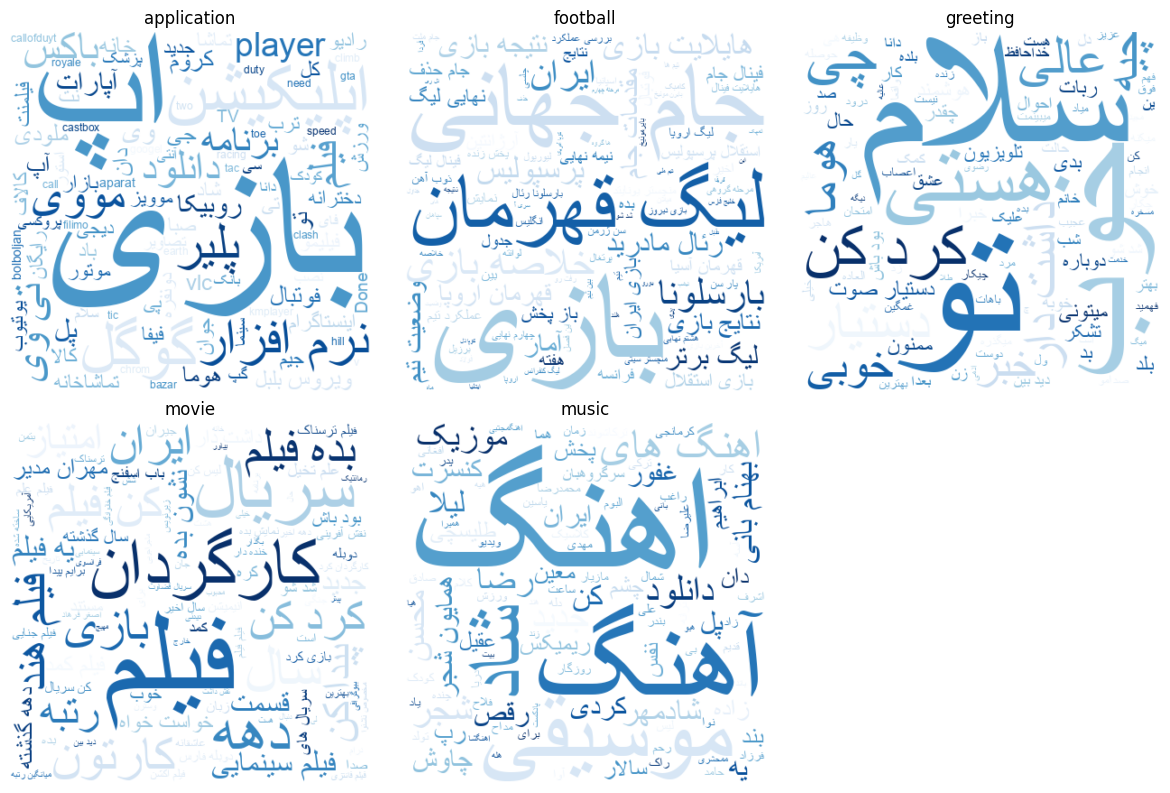

In [107]:
plot_wordclouds(df, 'processed_text', 'label')

## Step 3: **Train and Test Split and some data preperation to inject to the models**

In [109]:
# a function for getting all categeries
def get_categories(df):
    return df['label'].unique()

In [111]:
# Convert the 'text' and 'category' columns of the our dataFrame to numpy arrays, text is as "X" and category is as "Y" or target
# Flatten the resulting 2D arrays to 1D arrays for easy use in machine learning algorithms
X_data = df[['processed_text']].to_numpy().reshape(-1)
Y_data = df[['label']].to_numpy().reshape(-1)

In [112]:
# Printing some information about our data and then splitting it to Train to Test
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

n_categories = len(get_categories(df))
print('Number of categories: %d' % n_categories)


print('Loading Train Dataset...')

# split the data with a suitable ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=74)
print('Done!')

Texts in dataset: 2518
Number of categories: 5
Loading Train Dataset...
Done!


## Step 4: **Create Model**

Here we used `GridSearch` and cross-validation to find the best parameters.


*   We have applied **hyperparameter tuning** for each model



In [113]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [114]:
# Define the hyperparameters to tune for SGD Classifier model
parameters_SGD = {
    'clf__loss': ['hinge', 'log_loss', 'modified_huber'],
    'clf__penalty': ['l1', 'l2'],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}

pipeline = Pipeline([
    ('vect', CountVectorizer(strip_accents=None, lowercase=False)),
    ('clf', SGDClassifier())
])

clf = GridSearchCV(pipeline, parameters_SGD, cv=10, n_jobs=-1)

clf.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__loss': ['hinge', 'log_loss', 'modified_huber'],
                         'clf__penalty': ['l1', 'l2']})

In [115]:
# Define the hyperparameters to tune for Random Forest model
parameters_RandomForest = {
    'vect__stop_words': ['english', None],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__min_df': [1, 2, 3],
    'clf__n_estimators': [10, 50, 100],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

grid_search_RandomForest = GridSearchCV(pipeline, parameters_RandomForest, cv=10, n_jobs=-1)
grid_search_RandomForest.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 5, 10],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__n_estimators': [10, 50, 100],
                         'vect__max_df': [0.5, 0.75, 1.0],
                         'vect__min_df': [1, 2, 3],
                         'vect__stop_words': ['english', None]})

In [116]:
# Define the hyperparameters to tune for SVC model
parameters_svc = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__kernel': ['linear', 'rbf'],
    'clf__C': [0.01, 0.1, 1],
    'clf__gamma': [0.01, 0.1, 1]
}

pipeline_svc = Pipeline([
    ('vect', CountVectorizer(strip_accents=None, lowercase=False)),
    ('clf', SVC())
])

grid_search_svm = GridSearchCV(pipeline_svc, parameters_svc, cv=10, n_jobs=-1)
grid_search_svm.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1], 'clf__gamma': [0.01, 0.1, 1],
                         'clf__kernel': ['linear', 'rbf'],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [117]:
# Define the hyperparameters to tune for Logistic Regression model
parameters_logistic = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__penalty': ['l2'],
    'clf__C': [0.01, 0.1, 1, 10]
}

pipeline_logistic = Pipeline([
    ('vect', CountVectorizer(strip_accents=None, lowercase=False)),
    ('clf', LogisticRegression())
])

grid_search_logistic = GridSearchCV(pipeline_logistic, parameters_logistic, cv=10, n_jobs=-1)
grid_search_logistic.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l2'],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

**SGDClassifier, Ransom Forest, SVC and Logistic Regression Models with tuning the hyperparameters**


*   The best parameters for each model have been printed



In [118]:
print('Best parameters set of SGDClassifier:')
print(clf.best_params_)
print('Best parameters set of RandomForest classifier:')
print(grid_search_RandomForest.best_params_)
print('Best parameters set of SVM classifier:')
print(grid_search_svm.best_params_)
print('Best parameters set of Logistic classifier:')
print(grid_search_logistic.best_params_)

Best parameters set of SGDClassifier:
{'clf__alpha': 0.0001, 'clf__loss': 'log_loss', 'clf__penalty': 'l2'}
Best parameters set of RandomForest classifier:
{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 100, 'vect__max_df': 0.5, 'vect__min_df': 2, 'vect__stop_words': 'english'}
Best parameters set of SVM classifier:
{'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel': 'linear', 'vect__ngram_range': (1, 1)}
Best parameters set of Logistic classifier:
{'clf__C': 10, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1)}


## Step 5: **Evaluation**

* We have defined two functions for evaluating of models and plotting confusion matrix

In [119]:
def evaluate_model(X_test, Y_test, model):
    """
    Evaluates a trained machine learning model on a test set and prints the accuracy
    score and classification report.
    """

    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print("+-----------+-----------+-----------+-----------+")
    print("|           | Precision | Recall    | F1-Score  |")
    print("+-----------+-----------+-----------+-----------+")
    for label, metrics in report.items():
        if label in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        print(f"| {label:<9} | {precision:>9.2f} | {recall:>9.2f} | {f1_score:>9.2f} |")
        print("+-----------+-----------+-----------+-----------+")

In [120]:
def plot_confusion_matrix(X_test, Y_test, model):
    """
    Plots a confusion matrix for the predictions made by a model.
    """

    Y_pred = model.predict(X_test)

    confusion_mat = confusion_matrix(Y_test, Y_pred)
    confusion_mat_norm = np.around(confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis], decimals=2)

    label_names = list(range(len(confusion_mat_norm)))
    confusion_mat_df = pd.DataFrame(confusion_mat_norm,
                                     index=label_names,
                                     columns=label_names)

    fig = plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_mat_df, cmap=plt.cm.Blues, annot=True)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

Step 5.1. Evaluation of **SGDClassifier**

In [121]:
evaluate_model(X_test, Y_test, clf)

Accuracy: 0.9048

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.83 |      0.42 |      0.56 |
+-----------+-----------+-----------+-----------+
| football  |      0.92 |      0.99 |      0.95 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.94 |      0.86 |      0.90 |
+-----------+-----------+-----------+-----------+
| movie     |      0.88 |      0.96 |      0.92 |
+-----------+-----------+-----------+-----------+
| music     |      0.98 |      0.91 |      0.95 |
+-----------+-----------+-----------+-----------+


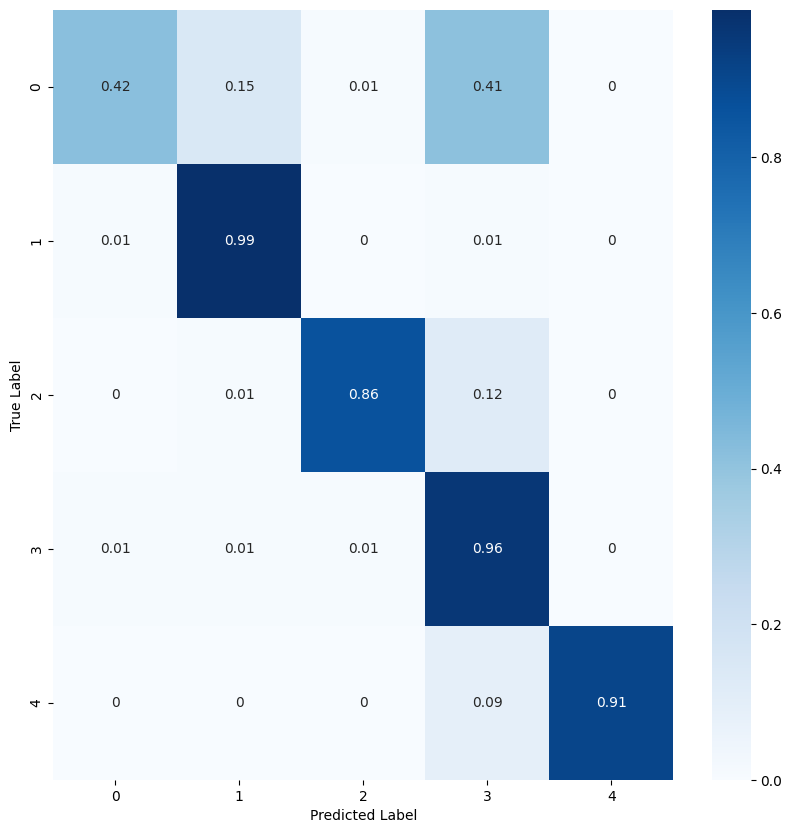

In [122]:
plot_confusion_matrix(X_test, Y_test, clf)

Step 5.2. Evaluation of **Random Forest Classifier**

In [123]:
evaluate_model(X_test, Y_test, grid_search_RandomForest)

Accuracy: 0.8664

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.45 |      0.90 |      0.60 |
+-----------+-----------+-----------+-----------+
| football  |      0.97 |      0.94 |      0.95 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.91 |      0.85 |      0.88 |
+-----------+-----------+-----------+-----------+
| movie     |      0.96 |      0.82 |      0.89 |
+-----------+-----------+-----------+-----------+
| music     |      0.98 |      0.90 |      0.94 |
+-----------+-----------+-----------+-----------+


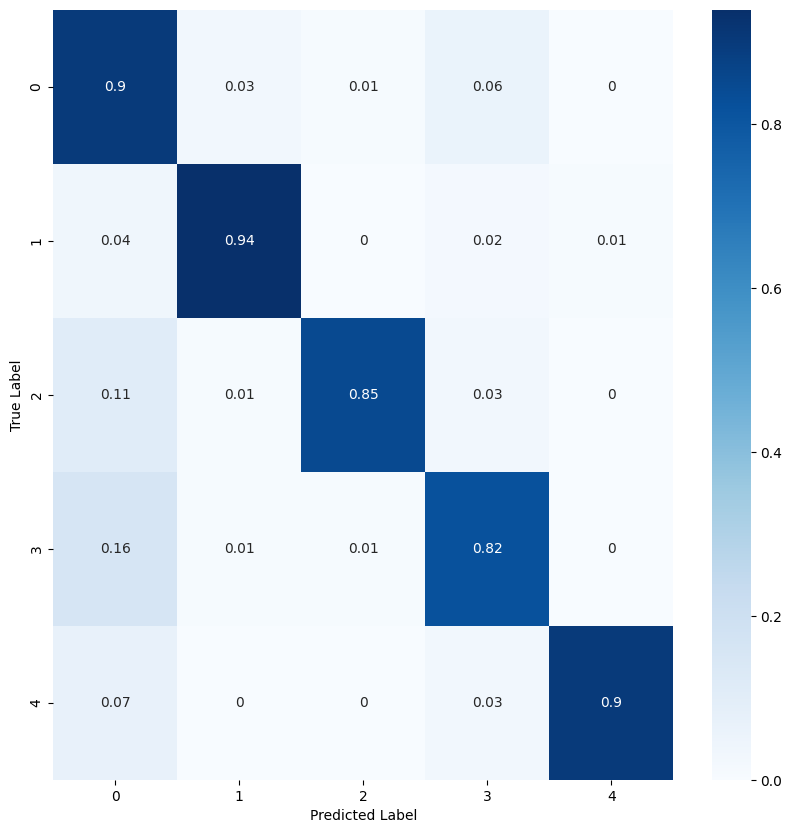

In [124]:
plot_confusion_matrix(X_test, Y_test, grid_search_RandomForest)

Step 5.3. Evaluation of **SVM Classifier**

In [125]:
evaluate_model(X_test, Y_test, grid_search_svm)

Accuracy: 0.8889

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.80 |      0.39 |      0.53 |
+-----------+-----------+-----------+-----------+
| football  |      0.93 |      0.95 |      0.94 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.89 |      0.84 |      0.86 |
+-----------+-----------+-----------+-----------+
| movie     |      0.86 |      0.96 |      0.91 |
+-----------+-----------+-----------+-----------+
| music     |      0.97 |      0.90 |      0.93 |
+-----------+-----------+-----------+-----------+


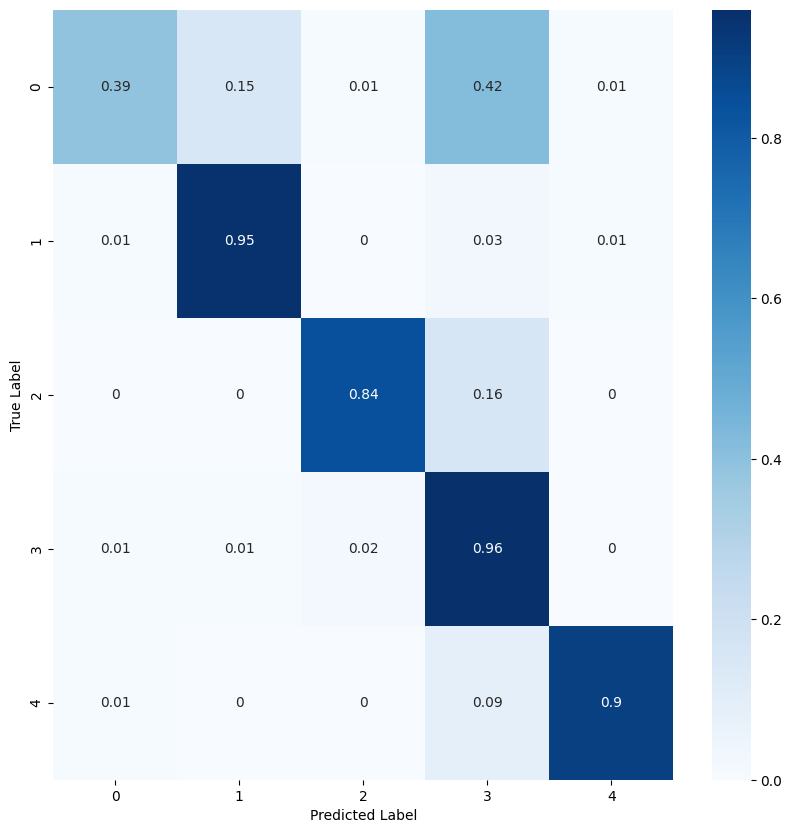

In [126]:
plot_confusion_matrix(X_test, Y_test, grid_search_svm)

Step 5.4. Evaluation of **Logistic Classifier**

In [127]:
evaluate_model(X_test, Y_test, grid_search_logistic)

Accuracy: 0.9021

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.81 |      0.42 |      0.56 |
+-----------+-----------+-----------+-----------+
| football  |      0.93 |      0.99 |      0.96 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.91 |      0.86 |      0.89 |
+-----------+-----------+-----------+-----------+
| movie     |      0.88 |      0.96 |      0.92 |
+-----------+-----------+-----------+-----------+
| music     |      0.98 |      0.91 |      0.95 |
+-----------+-----------+-----------+-----------+


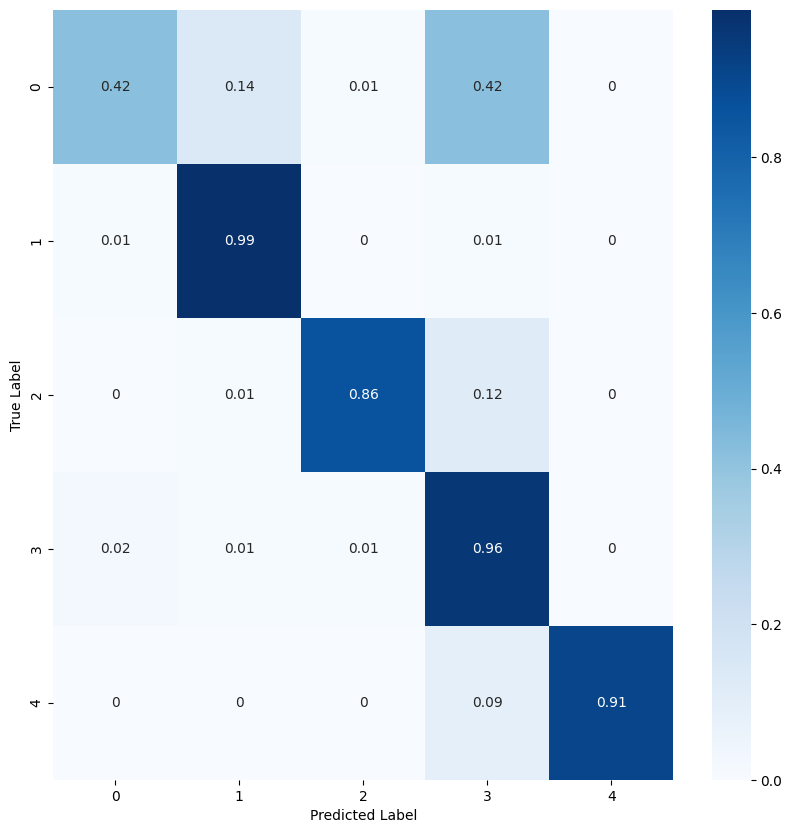

In [128]:
plot_confusion_matrix(X_test, Y_test, grid_search_logistic)

## Step 6: Model Improvement
* During the evaluation phase of our models, it was observed that the classes "movie" and "application" were frequently mispredicted in favor of each other, which can be attributed to the issue of **class imbalance** in our dataset.

In [129]:
# Printing some information about our data and then splitting it to Train to Test
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

n_categories = len(get_categories(df))
print('Number of categories: %d' % n_categories)


print('Loading Train Dataset...')

# split the data with a suitable ratio with stratified sampling
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=74, stratify=Y_data)
print('Done!')

Texts in dataset: 2518
Number of categories: 5
Loading Train Dataset...
Done!


In [130]:
# Define the hyperparameters to tune for SGD Classifier model
parameters_SGD = {
    'clf__loss': ['hinge', 'log_loss', 'modified_huber'],
    'clf__penalty': ['l1', 'l2'],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.1]
}

pipeline = Pipeline([
    ('vect', CountVectorizer(strip_accents=None, lowercase=False)),
    ('clf', SGDClassifier())
])

clf = GridSearchCV(pipeline, parameters_SGD, cv=10, n_jobs=-1)

clf.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'clf__loss': ['hinge', 'log_loss', 'modified_huber'],
                         'clf__penalty': ['l1', 'l2']})

In [131]:
# Define the hyperparameters to tune for Random Forest model
parameters_RandomForest = {
    'vect__stop_words': ['english', None],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__min_df': [1, 2, 3],
    'clf__n_estimators': [10, 50, 100],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

grid_search_RandomForest = GridSearchCV(pipeline, parameters_RandomForest, cv=10, n_jobs=-1)
grid_search_RandomForest.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 5, 10],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__n_estimators': [10, 50, 100],
                         'vect__max_df': [0.5, 0.75, 1.0],
                         'vect__min_df': [1, 2, 3],
                         'vect__stop_words': ['english', None]})

In [132]:
# Define the hyperparameters to tune for SVC model
parameters_svc = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__kernel': ['linear', 'rbf'],
    'clf__C': [0.01, 0.1, 1],
    'clf__gamma': [0.01, 0.1, 1]
}

pipeline_svc = Pipeline([
    ('vect', CountVectorizer(strip_accents=None, lowercase=False)),
    ('clf', SVC())
])

grid_search_svm = GridSearchCV(pipeline_svc, parameters_svc, cv=10, n_jobs=-1)
grid_search_svm.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1], 'clf__gamma': [0.01, 0.1, 1],
                         'clf__kernel': ['linear', 'rbf'],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [133]:
# Define the hyperparameters to tune for Logistic Regression model
parameters_logistic = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__penalty': ['l2'],
    'clf__C': [0.01, 0.1, 1, 10]
}

pipeline_logistic = Pipeline([
    ('vect', CountVectorizer(strip_accents=None, lowercase=False)),
    ('clf', LogisticRegression())
])

grid_search_logistic = GridSearchCV(pipeline_logistic, parameters_logistic, cv=10, n_jobs=-1)
grid_search_logistic.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(lowercase=False)),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l2'],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [134]:
evaluate_model(X_test, Y_test, clf)

Accuracy: 0.8783

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.84 |      0.43 |      0.57 |
+-----------+-----------+-----------+-----------+
| football  |      0.93 |      0.95 |      0.94 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.88 |      0.79 |      0.84 |
+-----------+-----------+-----------+-----------+
| movie     |      0.84 |      0.96 |      0.90 |
+-----------+-----------+-----------+-----------+
| music     |      0.97 |      0.85 |      0.91 |
+-----------+-----------+-----------+-----------+


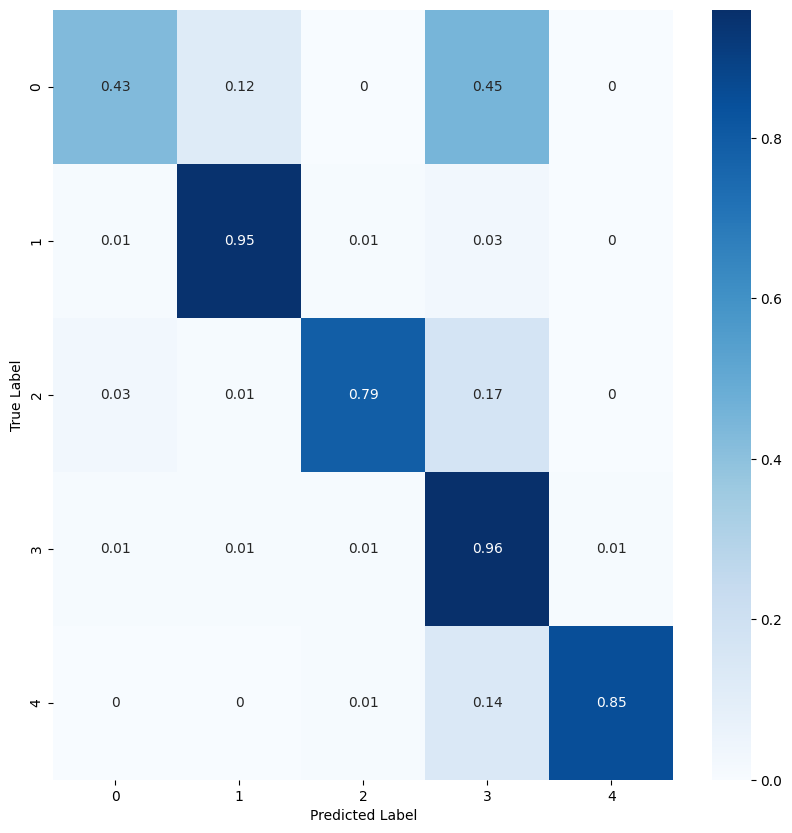

In [135]:
plot_confusion_matrix(X_test, Y_test, clf)

In [136]:
evaluate_model(X_test, Y_test, grid_search_svm)

Accuracy: 0.8823

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.80 |      0.53 |      0.64 |
+-----------+-----------+-----------+-----------+
| football  |      0.98 |      0.93 |      0.95 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.85 |      0.78 |      0.81 |
+-----------+-----------+-----------+-----------+
| movie     |      0.84 |      0.96 |      0.90 |
+-----------+-----------+-----------+-----------+
| music     |      0.98 |      0.85 |      0.91 |
+-----------+-----------+-----------+-----------+


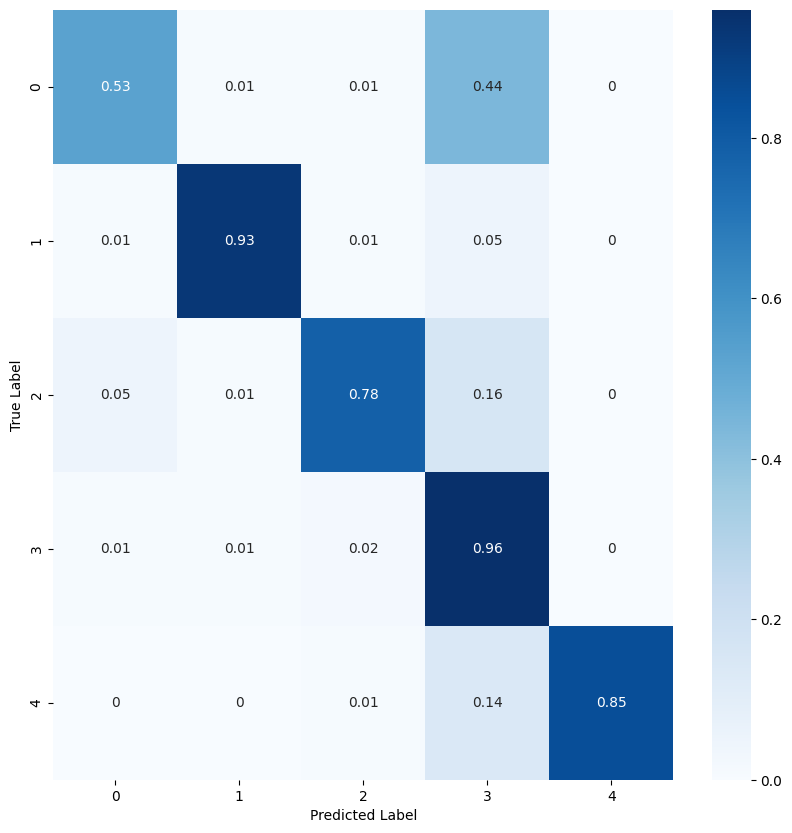

In [137]:
plot_confusion_matrix(X_test, Y_test, grid_search_svm)

In [138]:
evaluate_model(X_test, Y_test, grid_search_RandomForest)

Accuracy: 0.8545

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.45 |      0.92 |      0.61 |
+-----------+-----------+-----------+-----------+
| football  |      0.98 |      0.93 |      0.95 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.86 |      0.71 |      0.78 |
+-----------+-----------+-----------+-----------+
| movie     |      0.96 |      0.84 |      0.90 |
+-----------+-----------+-----------+-----------+
| music     |      0.98 |      0.84 |      0.91 |
+-----------+-----------+-----------+-----------+


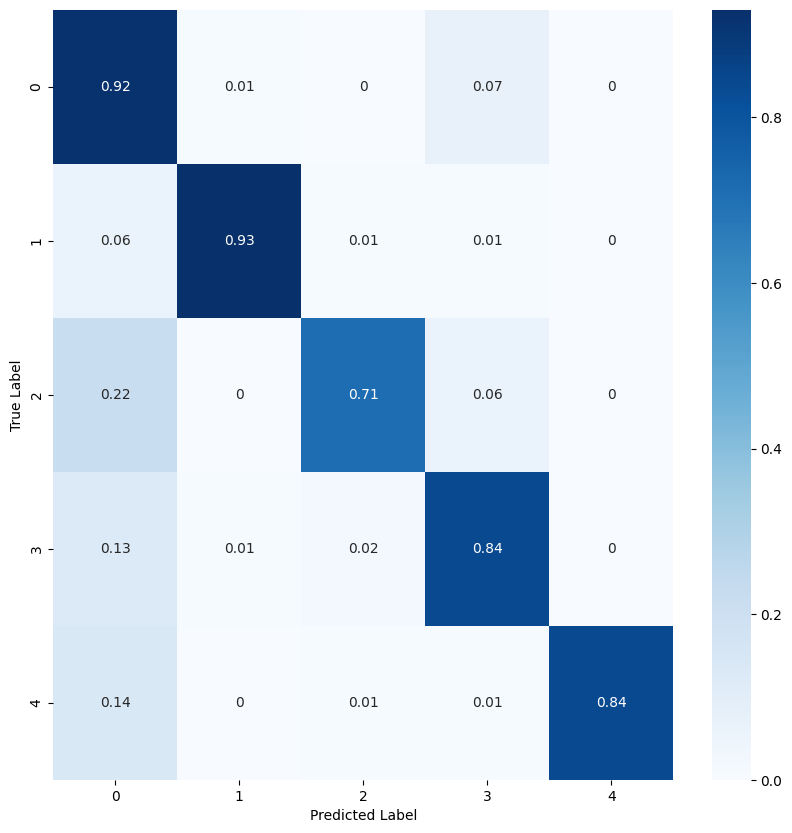

In [139]:
plot_confusion_matrix(X_test, Y_test, grid_search_RandomForest)

In [140]:
evaluate_model(X_test, Y_test, grid_search_logistic)

Accuracy: 0.8915

Classification Report:
+-----------+-----------+-----------+-----------+
|           | Precision | Recall    | F1-Score  |
+-----------+-----------+-----------+-----------+
| application |      0.87 |      0.55 |      0.67 |
+-----------+-----------+-----------+-----------+
| football  |      0.98 |      0.94 |      0.96 |
+-----------+-----------+-----------+-----------+
| greeting  |      0.87 |      0.81 |      0.84 |
+-----------+-----------+-----------+-----------+
| movie     |      0.85 |      0.96 |      0.90 |
+-----------+-----------+-----------+-----------+
| music     |      0.97 |      0.86 |      0.91 |
+-----------+-----------+-----------+-----------+


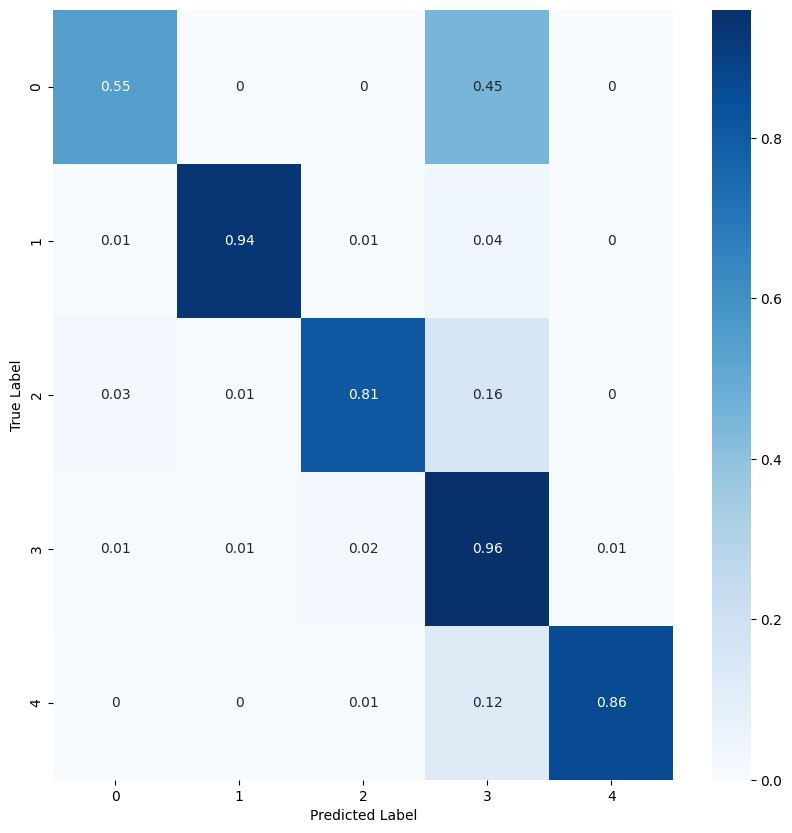

In [141]:
plot_confusion_matrix(X_test, Y_test, grid_search_logistic)